# 라이브러리 로드

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
from glob import glob
import os

In [2]:
# 경고창 무시 
import warnings
warnings.filterwarnings('ignore')

# 한글폰트 사용을 위한 세팅

In [3]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

# 데이터셋 로드

In [12]:
import glob
path = glob.glob('data1/*.xlsx')
path

['data1\\[썸트렌드] 애견동반_언급량_210622-220621_모든채널.xlsx']

In [13]:
df = pd.read_excel(path[0])
df

,날짜,합계,커뮤니티,인스타그램,블로그,뉴스,트위터
0,2021.06.22,319,14,122,178,3,2
1,2021.06.23,278,6,105,163,1,3
2,2021.06.24,270,9,109,149,0,3
3,2021.06.25,261,13,109,128,8,3
4,2021.06.26,233,8,118,106,0,1
...,...,...,...,...,...,...,...
359,2022.06.16,372,15,126,225,0,6
360,2022.06.17,370,8,149,206,1,6
361,2022.06.18,333,9,160,164,0,0
362,2022.06.19,377,8,147,217,0,5


# 데이터 확인 및 클렌징 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      364 non-null    object
 1   합계      364 non-null    int64 
 2   커뮤니티    364 non-null    int64 
 3   인스타그램   364 non-null    int64 
 4   블로그     364 non-null    int64 
 5   뉴스      364 non-null    int64 
 6   트위터     364 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 20.0+ KB


In [16]:
#결측치 확인 , 없당
df.isna().sum()

날짜       0
합계       0
커뮤니티     0
인스타그램    0
블로그      0
뉴스       0
트위터      0
dtype: int64

In [21]:
# 합께 컬럼은 필요 없으니 삭제 
df = df.drop('합계', axis = 1)

# 데이터 eda 시작 

In [ ]:
# 1년동안 각 채널별로 '애견동반' 키워드가 언급 된 통계치 

In [22]:
df.describe()

,커뮤니티,인스타그램,블로그,뉴스,트위터
count,364.000000,364.000000,364.000000,364.000000,364.000000
mean,8.156593,128.813187,174.604396,0.678571,3.282967
std,3.726191,22.126440,43.123918,0.892875,2.523637
min,0.000000,75.000000,88.000000,0.000000,0.000000
25%,6.000000,112.000000,142.750000,0.000000,2.000000
50%,8.000000,128.000000,165.500000,1.000000,3.000000
75%,10.000000,144.000000,201.250000,1.000000,5.000000
max,25.000000,207.000000,330.000000,8.000000,24.000000


In [23]:
df_t = df.transpose()

In [24]:
df_t.rename(columns = df_t.iloc[0]).drop(df_t.index[0])

,2021.06.22,2021.06.23,2021.06.24,2021.06.25,2021.06.26,2021.06.27,2021.06.28,2021.06.29,2021.06.30,2021.07.01,...,2022.06.11,2022.06.12,2022.06.13,2022.06.14,2022.06.15,2022.06.16,2022.06.17,2022.06.18,2022.06.19,2022.06.20
커뮤니티,14,6,9,13,8,12,10,12,13,1,...,6,7,15,7,7,15,8,9,8,21
인스타그램,122,105,109,109,118,138,151,127,122,119,...,126,144,114,114,145,126,149,160,147,150
블로그,178,163,149,128,106,160,178,157,147,156,...,172,301,258,244,198,225,206,164,217,200
뉴스,3,1,0,8,0,0,1,1,0,1,...,0,0,1,2,1,0,1,0,0,2
트위터,2,3,3,3,1,2,2,3,2,0,...,14,9,9,8,4,6,6,0,5,7


## plot 1 keyword : 애견동반 / channel : 커뮤니티 

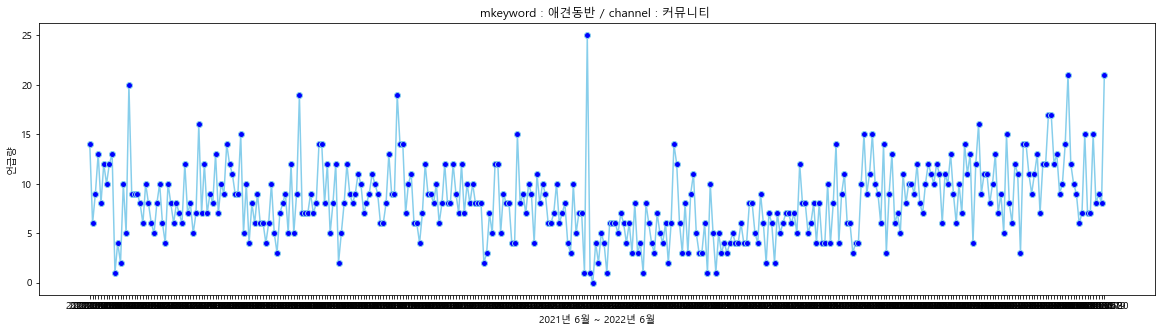

In [27]:
#plot 1 keyword : 애견동반 / channel : 커뮤니티  언급량
plt.figure(figsize=(20, 5)) #그래프 길이 조정 

plt.plot(df['날짜'], df['커뮤니티'],
         color='skyblue',
         marker='o', markerfacecolor='blue',
         markersize=6)
plt.xlabel('2021년 6월 ~ 2022년 6월') #x 라벨
plt.ylabel('언급량') #y 라벨
plt.title('mkeyword : 애견동반 / channel : 커뮤니티 ')

#그래프 출력
plt.show()

## plot 2 keyword : 애견동반 / channel : 인스타그램 

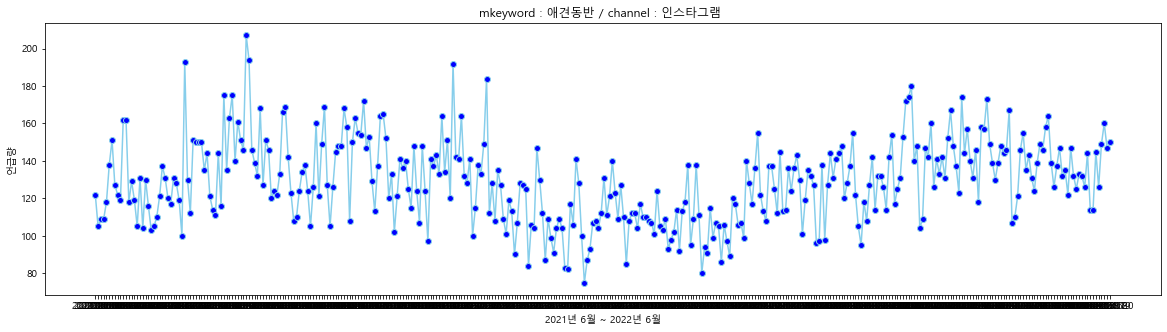

In [28]:
# plot 2 keyword : 애견동반 / channel : 인스타그램 
plt.figure(figsize=(20, 5)) #그래프 길이 조정 

plt.plot(df['날짜'], df['인스타그램'],
         color='skyblue',
         marker='o', markerfacecolor='blue',
         markersize=6)
plt.xlabel('2021년 6월 ~ 2022년 6월') #x 라벨
plt.ylabel('언급량') #y 라벨
plt.title('mkeyword : 애견동반 / channel : 인스타그램 ')

#그래프 출력
plt.show()

## plot 3 keyword : 애견동반 / channel : 블로그

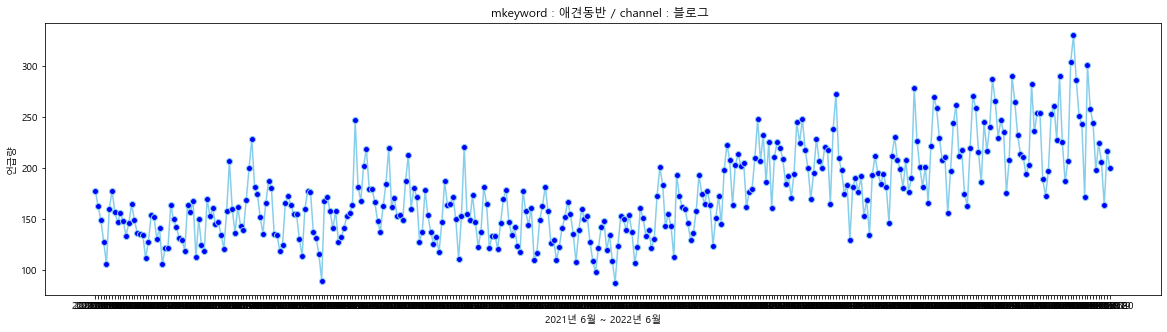

In [29]:
# plot 3 keyword : 애견동반 / channel : 블로그
plt.figure(figsize=(20, 5)) #그래프 길이 조정 

plt.plot(df['날짜'], df['블로그'],
         color='skyblue',
         marker='o', markerfacecolor='blue',
         markersize=6)
plt.xlabel('2021년 6월 ~ 2022년 6월') #x 라벨
plt.ylabel('언급량') #y 라벨
plt.title('mkeyword : 애견동반 / channel : 블로그 ')

#그래프 출력
plt.show()

## plot 4 keyword : 애견동반 / channel : 뉴스 

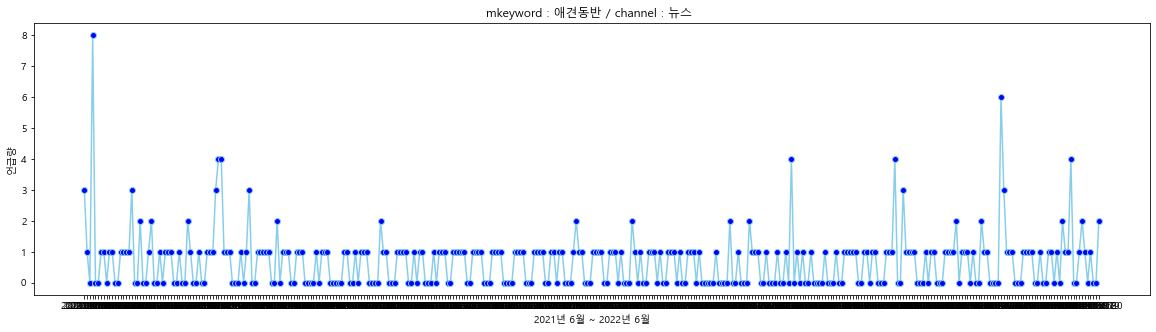

In [ ]:
# plot 4 keyword : 애견동반 / channel : 뉴스
plt.figure(figsize=(20, 5)) #그래프 길이 조정 

plt.plot(df['날짜'], df['뉴스'],
         color='skyblue',
         marker='o', markerfacecolor='blue',
         markersize=6)
plt.xlabel('2021년 6월 ~ 2022년 6월') #x 라벨
plt.ylabel('언급량') #y 라벨
plt.title('mkeyword : 애견동반 / channel : 뉴스 ')

#그래프 출력
plt.show()

## plot 5 keyword : 애견동반 / channel : 트위터

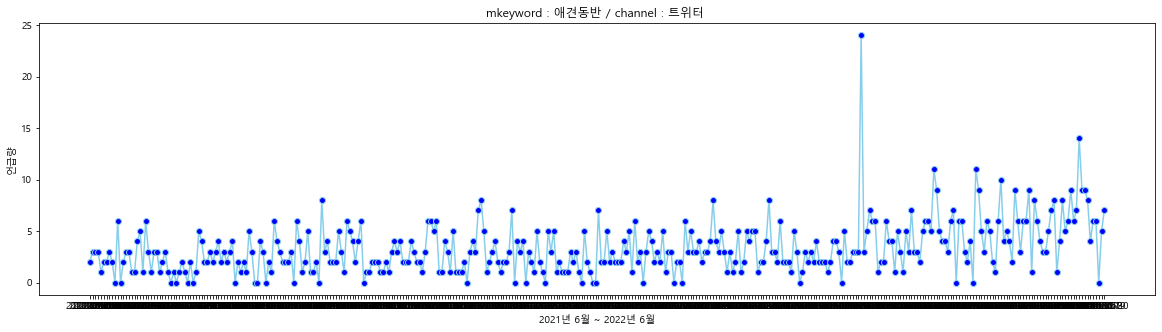

In [31]:
# plot 5 keyword : 애견동반 / channel : 뉴스
plt.figure(figsize=(20, 5)) #그래프 길이 조정 

plt.plot(df['날짜'], df['트위터'],
         color='skyblue',
         marker='o', markerfacecolor='blue',
         markersize=6)
plt.xlabel('2021년 6월 ~ 2022년 6월') #x 라벨
plt.ylabel('언급량') #y 라벨
plt.title('mkeyword : 애견동반 / channel : 트위터 ')

#그래프 출력
plt.show()